In [40]:
import os
from glob import glob
import shutil
import conda

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.palettes import Accent
from tqdm.notebook import tqdm
import time

## Locations

Extract unique geolocations per data, get coordinates and save to enable manual correction.

In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='MSS4')
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=3)

In [4]:
def clean_folder(folder):
    try:
        shutil.rmtree(folder)
    except FileNotFoundError:
        pass
    os.mkdir(folder)

clean_folder('../datasets/locations')

In [6]:
def geolocate(df):
    # remove multiple locations
    #df = df.head(5)
    df = df[~df['repository'].str.contains(';', na=False)]
    # retrieve unique city locations
    places = set([place.split(',')[0].strip() for place in df['repository'] if isinstance(place, str)])
    
    items = []
    for place in tqdm(sorted(places)):
        time.sleep(7)
        location = geocode(place, addressdetails=True)
        try:
            meta = (place, location.raw['address']['city'], location.raw['display_name'],
                    location.latitude, location.longitude)
            items.append(meta)
        except (KeyError, AttributeError):
            items.append((place, None, None, None, None))
            print(place, 'didnt pass')
        
    locations = pd.DataFrame(items)
    locations.columns = 'place city display latitude longitude'.split()
    return locations

In [7]:
for fn in tqdm(glob('../datasets/master/*.xlsx')):
    language = os.path.basename(fn).replace('.xlsx', '')
    df = pd.read_excel(fn)
    print(language)
    locations = geolocate(df)
    locations.to_excel(f'../datasets/locations/{language}.xlsx', header=True, index=False)

  0%|          | 0/7 [00:00<?, ?it/s]

anglo-norman


  0%|          | 0/13 [00:00<?, ?it/s]

Cologny-Geneva didnt pass
Oxford didnt pass
Wolfenbuttel didnt pass
dutch


  0%|          | 0/46 [00:00<?, ?it/s]

Abdijbibliotheek van Berne didnt pass


RateLimiter caught an error, retrying (0/2 tries). Called with (*('Arras',), **{'addressdetails': True}).
Traceback (most recent call last):
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1262, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1308, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1257, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1036, in _send_output
    self.send(msg)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/clie

Arras didnt pass
Bourbourg didnt pass
Burgsteinfurt didnt pass
Donaueschingen didnt pass
Krakau didnt pass
Michelstadt didnt pass


RateLimiter caught an error, retrying (0/2 tries). Called with (*('Nijmegen',), **{'addressdetails': True}).
Traceback (most recent call last):
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/site-packages/geopy/geocoders/base.py", line 367, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 526, in open
    response = self._open(req, data)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 544, in _open
    '_open', req)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 1361, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 1321, in do_open
    r = h.

Nürenberg didnt pass
Oxford didnt pass


RateLimiter caught an error, retrying (0/2 tries). Called with (*('Riga',), **{'addressdetails': True}).
Traceback (most recent call last):
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/site-packages/geopy/geocoders/base.py", line 367, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 526, in open
    response = self._open(req, data)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 544, in _open
    '_open', req)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 1361, in https_open
    context=self._context, check_hostname=self._check_hostname)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 1321, in do_open
    r = h.getr

Steinfurt didnt pass
UNK didnt pass
Vercelli didnt pass
icelandic


  0%|          | 0/9 [00:00<?, ?it/s]

Arnamagnæan Collection didnt pass
Herzog August Bibliothek didnt pass
Héraðsskjalasafn Skagfirðinga didnt pass


RateLimiter caught an error, retrying (0/2 tries). Called with (*('National Archives',), **{'addressdetails': True}).
Traceback (most recent call last):
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1262, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1308, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1257, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1036, in _send_output
    self.send(msg)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3

Árni Magnússon Institute for Icelandic Studies didnt pass
english


  0%|          | 0/22 [00:00<?, ?it/s]

Aberystwyth didnt pass
Badminton didnt pass
Oxford didnt pass
Princeton University Library didnt pass
San Marino didnt pass
Sussex didnt pass
irish


  0%|          | 0/11 [00:00<?, ?it/s]

University College Dublin didnt pass
german


  0%|          | 0/203 [00:00<?, ?it/s]

Aarau didnt pass
Alba Julia / Karlsburg didnt pass
Altenburg (NÖ) didnt pass
Amberg didnt pass
Amorbach didnt pass
Arnstein didnt pass
Arolsen/BadArolsen didnt pass
Augsburg (verschollen) didnt pass
Bad Berleburg didnt pass


RateLimiter caught an error, retrying (0/2 tries). Called with (*('Bludenz (Vorarlberg)',), **{'addressdetails': True}).
Traceback (most recent call last):
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1262, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1308, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1257, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1036, in _send_output
    self.send(msg)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/pyth

Bludenz (Vorarlberg) didnt pass
Braunsberg / Braniewo (Polen) didnt pass
Breslau / Wrocław didnt pass
Breslau/Wroclaw didnt pass
Brieg /Brzeg didnt pass
Coburg didnt pass
Cologny - Genf didnt pass
Cologny-Genf didnt pass
Dessau didnt pass
Dietfurt didnt pass
Dillingen didnt pass
Dinkelsbühl didnt pass
Edingen / Enghien (Belgien) didnt pass
Eichstätt didnt pass
Einsiedeln didnt pass
Eisleben didnt pass
Eltville didnt pass
Feldkirch didnt pass
Fiecht-St. Georgenberg (Tirol) didnt pass


RateLimiter caught an error, retrying (0/2 tries). Called with (*('Frankfurt a. M.',), **{'addressdetails': True}).
Traceback (most recent call last):
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1262, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1308, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1257, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1036, in _send_output
    self.send(msg)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6

Frauenfeld didnt pass
Freising didnt pass
Fulda didnt pass
Gießen didnt pass
Goslar didnt pass
Gotha didnt pass
Kempen didnt pass
Klosterneuburg didnt pass
Konstanz didnt pass
Krakau didnt pass
Kremsmünster didnt pass
Krotoszyn/Krotoschin (Polen) didnt pass
Krumau / Český Krumlov didnt pass
Laubach didnt pass
Laufenburg (Schweiz) didnt pass
Leutkirch didnt pass
Lindau didnt pass
Lüneburg didnt pass
Marburg didnt pass
Meiningen didnt pass
Melk didnt pass
Mengeringhausen (Waldeck) didnt pass
Metten didnt pass
Michaelbeuern (bei Salzburg) didnt pass
Modena didnt pass
Molsberg didnt pass
Münster didnt pass
Nelahozeves didnt pass
Næstved (Dänemark) didnt pass
Ochsenfurt didnt pass


RateLimiter caught an error, retrying (0/2 tries). Called with (*('Osnabrück',), **{'addressdetails': True}).
Traceback (most recent call last):
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1262, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1308, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1257, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/client.py", line 1036, in _send_output
    self.send(msg)
  File "/Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/http/

Oxford didnt pass
Pommersfelden didnt pass
Privatbesitz didnt pass
Privatbesitz (?) N. N. (3) didnt pass
Privatbesitz Antiquariat Dr. Jörn Günther didnt pass
Privatbesitz Eduard Kausler didnt pass
Privatbesitz Franz Ludwig Mittler didnt pass
Privatbesitz Freiherr zu Rhein didnt pass
Privatbesitz Isidoro Alvera didnt pass
Privatbesitz Justus Möser (verschollen) didnt pass
Privatbesitz "unbekannter Gönner" didnt pass
Privatbesitz Amberg didnt pass
Privatbesitz Antiquariat Ludwig Rosenthal didnt pass
Privatbesitz Antiquariat Reiss & Sohn didnt pass
Privatbesitz Auktionshaus Venator didnt pass
Privatbesitz Bernhard Joseph Docen (?) didnt pass
Privatbesitz Ernst Friedrich Mooyer didnt pass
Privatbesitz Gräfl. Familie zu Knyphausen didnt pass
Privatbesitz Heinrich Schreiber didnt pass
Privatbesitz Johann Georg Scherz didnt pass
Privatbesitz Lord Ashburnham (Barrois-Hss.) didnt pass
Privatbesitz Oscar Schade didnt pass
Privatbesitz Philipp Fürst zu Stolberg-Wernigerode didnt pass
Privatbes

  0%|          | 0/158 [00:00<?, ?it/s]

ABERYSTWYTH didnt pass
ALBI didnt pass
ARRAS didnt pass
BERLIN en dépôt à KRAKOW didnt pass
BOULOGNE-SUR-MER didnt pass
BRESCIA didnt pass
CARPENTRAS didnt pass
CHALONS-EN-CHAMPAGNE didnt pass
CHANTILLY didnt pass
CHARTRES didnt pass
CHATEAUROUX didnt pass
CHIERI didnt pass
COLOGNY (GENEVE) didnt pass
COLUMBIA didnt pass
CREMONA didnt pass
CUNEO didnt pass
Châtillon didnt pass
Cuorgnè didnt pass
DURHAM didnt pass
EPINAL didnt pass
ESCORIAL (EL) didnt pass
EVREUX didnt pass
FABRIANO didnt pass
FRIBOURG didnt pass
GDANSK didnt pass
GIESSEN AN DER LAHN didnt pass
LAON didnt pass
LOUVIGNY didnt pass
LUGO didnt pass
MALIBU didnt pass
MANTOVA didnt pass
MICHELSTADT didnt pass
MODENA didnt pass
MONTSERRAT didnt pass
NEUCHATEL didnt pass
OXFORD didnt pass
PERIGUEUX didnt pass
PISTOIA didnt pass
PORRENTRUY didnt pass
PRINCETON didnt pass
PRIVAS didnt pass
Puigcerda didnt pass
REGGIO EMILIA didnt pass
ROCHEFORT didnt pass
SAINT ANDREWS didnt pass
SAINT-BRIEUC didnt pass
SAINT-GERMAIN-EN-LAYE did

## Geolocate

Add the geolocations to the witnesses

In [112]:
clean_folder('../datasets/geolocated')

In [113]:
def assign_geolocations(language):
    df_locations = pd.read_excel(f'../datasets/locations/{language}.xlsx')
    df_locations = df_locations.set_index('place')
    
    df_mss = pd.read_excel(f'../datasets/master/{language}.xlsx', header=0)
    df_mss = df_mss[~df_mss['repository'].str.contains(';', na=False)]
    df_mss = df_mss[['title', 'signature', 'repository', 'fragmentary']]
    
    
    geolocated = []
    for row in df_mss.itertuples():
        row = list(row)[1:]
        place = row[2]
        if isinstance(place, str):
            place = place.split(',')[0].strip()
            place = place.split(' and ')[-1]
            try:
                meta = df_locations.loc[place].tolist()
            except IndexError:
                meta = [None, None, None, None]
            geolocated.append(row + meta)
    
    geolocated = pd.DataFrame(geolocated)
    geolocated.columns = list(df_mss.columns) + 'city display latitude longitude'.split()
    geolocated.to_excel(f'../datasets/geolocated/{language}.xlsx', header=True, index=False)
    
    
for fn in tqdm(glob('../datasets/master/*.xlsx')):
    language = os.path.basename(fn).replace('.xlsx', '')
    print(language)
    assign_geolocations(language)

  0%|          | 0/7 [00:00<?, ?it/s]

anglo-norman
dutch
icelandic
english
irish
german
french


## Map plots

In [148]:
def clean_folder(folder):
    try:
        shutil.rmtree(folder)
    except FileNotFoundError:
        pass
    os.mkdir(folder)

clean_folder('../datasets/maps')
clean_folder('../datasets/maps/html')
clean_folder('../datasets/maps/png')

In [149]:
from folium import Map
from folium.plugins import HeatMap

In [150]:
fns = sorted(glob(f'../datasets/geolocated/*.xlsx'))

for fn in fns:
    print(fn)
    language = os.path.basename(fn).replace('.xlsx',  '')
    geo_df = pd.read_excel(fn)
    geo_df = geo_df[['longitude', 'latitude']].dropna()

    for_map = Map(location=[50, 10], zoom_start=4.5, tiles='CartoDB PositronNoLabels') # Stamen watercolo

    hm_wide = HeatMap(
        list(zip(geo_df['latitude'].values, geo_df['longitude'].values)),
        min_opacity=0.2,
        radius=33, 
        blur=43, 
        max_zoom=1,
        zoom_control=False,
        scrollWheelZoom=False,
        dragging=False
    )

    for_map.add_child(hm_wide)
    for_map.save(f'../datasets/maps/html/{language}.html')

../datasets/geolocated/anglo-norman.xlsx
../datasets/geolocated/dutch.xlsx
../datasets/geolocated/english.xlsx
../datasets/geolocated/french.xlsx
../datasets/geolocated/german.xlsx
../datasets/geolocated/icelandic.xlsx
../datasets/geolocated/irish.xlsx


In [151]:
import os
from pathlib import Path
path = Path(os.getcwd())
parp = path.parent.absolute()

In [152]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

browser = webdriver.Chrome(ChromeDriverManager().install())

for language in 'dutch english german french'.split():
    browser.get(f'file:///{parp}/datasets/maps/html/{language}.html')
    browser.get_screenshot_as_file(f'../datasets/maps/png/{language}.png') 

[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/mikekestemont/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


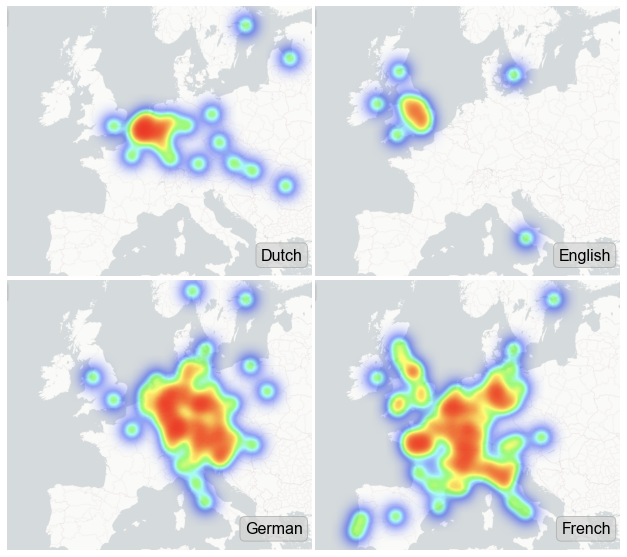

In [153]:
from mpl_toolkits.axes_grid1 import ImageGrid


fig = plt.figure(figsize=(15, 10))
grid = ImageGrid(fig, 111,  share_all = True,
                 nrows_ncols=(2, 2),
                 axes_pad=0.05,  # pad between axes in inch.
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])

vert_stride = 27
hort_stride = 70

for ax, language in zip(grid, 'dutch english german french'.split()):
    img = plt.imread(f'../datasets/maps/png/{language}.png')
    img = img[:img.shape[0]-vert_stride, hort_stride:img.shape[1]-hort_stride*6]
    ax.annotate(language.capitalize(), xy=(0.97, 0.05), xycoords='axes fraction',
                horizontalalignment='right', verticalalignment='bottom',
                fontfamily='Arial', fontsize=16,
                bbox=dict(facecolor='lightgrey', edgecolor='darkgrey',
                          boxstyle='round', alpha=0.7))
    ax.axis('off')
    ax.imshow(img)


plt.savefig('../datasets/maps/grid.pdf', bbox_inches='tight')